# Opiod Model Using Basic Tau Leaping

### Imports

In [1]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_leaping_solver import BasicTauLeapingSolver


### Model Instantiation

Model based off the prescription opiod crisis in the United States. Based off a paper from the University of Tennessee
https://0afa17f2-bd49-4985-b62b-358fb4a6bf3f.filesusr.com/ugd/f70b03_22c7703e4a3b4da6b9555c738ed8566d.pdf

In [2]:
import gillespy2

class Opiod(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Opioid")
            
            #parameters
            alpha = gillespy2.Parameter(name='alpha', expression= 0.15) #0.15
            epsilon = gillespy2.Parameter(name='epsilon', expression= 0.8) #0.8-8
            beta_p = gillespy2.Parameter(name='beta_p', expression= 0.00266) #0.00266
            beta_a = gillespy2.Parameter(name='beta_a', expression= 0.00094) #0.00094
            gamma = gillespy2.Parameter(name='gamma', expression= 0.00744) #00744
            zeta = gillespy2.Parameter(name='zeta', expression= 0.2) #0.2-2
            delta = gillespy2.Parameter(name='delta', expression= 0.1) #0.1
            sigma = gillespy2.Parameter(name='sigma', expression= 0.9) #0.9
            mu = gillespy2.Parameter(name='mu', expression= 0.00729)  #0.00729
            mu_prime = gillespy2.Parameter(name='mu_prime', expression= 0.01159) #0.01159
            
         
            self.add_parameter([alpha,epsilon,beta_p,beta_a,gamma,zeta,delta,sigma,mu, mu_prime])
            
            #Species
            S = gillespy2.Species(name='Susceptibles', initial_value=1000)
            P = gillespy2.Species(name='Prescribed_Users', initial_value=0)
            A = gillespy2.Species(name='Addicted', initial_value=0)
            R = gillespy2.Species(name='Rehab', initial_value=0)
            Natural_Deaths = gillespy2.Species(name='Natural_Deaths',initial_value=0)
            Addiction_Deaths = gillespy2.Species(name='Addiction_Deaths',initial_value=0)
            self.add_species([S,P,A,R,Natural_Deaths,Addiction_Deaths])
            
            #reactions
            SP = gillespy2.Reaction(name="SP",reactants={S:1}, products={P:1},
                   rate=alpha)
            
            SA_a = gillespy2.Reaction(name="SA_a",reactants={S:1}, products={A:1},
                    rate=beta_a)
            
            SA_p = gillespy2.Reaction(name="SA_p",reactants={S:1}, products={A:1},
                    rate=beta_p)
            
            mu_S = gillespy2.Reaction(name="mu_S",reactants={S:1},products={S:1,Natural_Deaths:1},
                    rate = mu)
            
            PA = gillespy2.Reaction(name="PA",reactants={P:1}, products={A:1},
                    rate=gamma)
            
            PS = gillespy2.Reaction(name="PS",reactants={P:1}, products={S:1},
                    rate=epsilon)
            
            AR = gillespy2.Reaction(name="AR",reactants={A:1}, products={R:1},
                    rate=zeta)
            
            RA = gillespy2.Reaction(name="RA",reactants={R:1}, products={A:1},
                    rate=delta)
            
            RS = gillespy2.Reaction(name="RS",reactants={R:1}, products={S:1},
                    rate=sigma)
            
            mu_P = gillespy2.Reaction(name="mu_P",reactants={P:1}, products={S:1,Natural_Deaths:1},
                    rate=mu)
            
            mu_R = gillespy2.Reaction(name="m_R",reactants={R:1}, products={S:1,Natural_Deaths:1},
                    rate=mu)
            
            mu_prime_A = gillespy2.Reaction(name="mu_prime_A",reactants={A:1}, products={S:1,Addiction_Deaths:1},
                    rate=mu_prime)
            
            self.add_reaction([SP,PS,SA_a,SA_p,PA,AR,RA,RS,mu_P,mu_R,mu_prime_A,mu_S])
            self.timespan(numpy.linspace(0,200,201))

In [3]:
model = Opiod()


### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [4]:
%time results = model.run(solver=BasicTauLeapingSolver(), show_labels=True)

CPU times: user 3.9 s, sys: 12.7 ms, total: 3.91 s
Wall time: 3.91 s


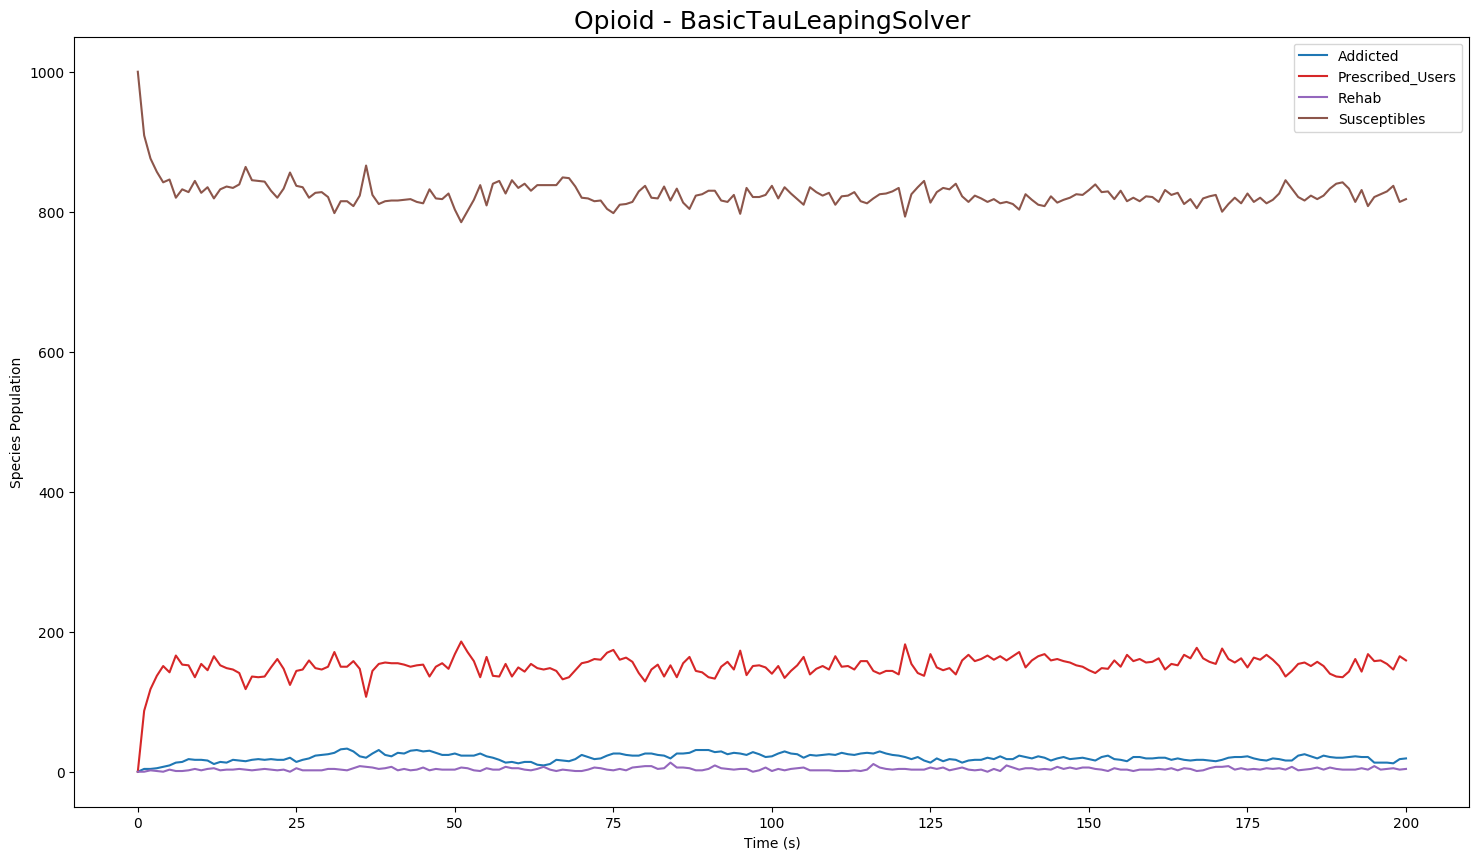

In [5]:
results.plot(included_species_list=['Susceptibles','Prescribed_Users','Addicted','Rehab'])

In [6]:
results.plotplotly()